### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Яссин Мохамад Аламин
##### Группа:   НКНбд-01-20

## Москва 2023
***

# Вариант №14
Лабораторная работа 2


## Текст задания:

1. Набор данных: wine_quality 

2. Независимая переменная: features/density 

3. Зависимая переменная: features/total sulfur dioxide 

4. Доп. признак: имеющий максимальную дисперсию 

5. Визуализация доп. признака – эмпирическая плотность распределения 

6. Показатель качества регрессии – MAE (mean absolute error) 

7. Степень полинома: 3 

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – relu. 

## Решение:

In [ ]:
# Все imports
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import learning_curve
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

### №1 
1- Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая2

Независимая переменная: features/density 

Зависимая переменная: features/total sulfur dioxide 

Доп. признак: имеющий максимальную дисперсию 

In [ ]:
dataset = tfds.load("wine_quality", split='train') 
df = tfds.as_dataframe(dataset)
# Удалим прерывные 
df.head()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/wine_quality/white/1.0.0.incompleteYZ3HH0/wine_quality-train.tfrecord*...:…

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [ ]:
df.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   features/alcohol               4898 non-null   float32
 1   features/chlorides             4898 non-null   float32
 2   features/citric acid           4898 non-null   float32
 3   features/density               4898 non-null   float32
 4   features/fixed acidity         4898 non-null   float32
 5   features/free sulfur dioxide   4898 non-null   float32
 6   features/pH                    4898 non-null   float32
 7   features/residual sugar        4898 non-null   float32
 8   features/sulphates             4898 non-null   float64
 9   features/total sulfur dioxide  4898 non-null   float32
 10  features/volatile acidity      4898 non-null   float32
 11  quality                        4898 non-null   int32  
dtypes: float32(10), float6

In [ ]:
X = df['features/density']
y = df['features/total sulfur dioxide']

### №2
2- Решите задачу полиномиальной регрессии для 3-ей степени полинома, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, MAE


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(X_train.values.reshape(-1, 1))
X_test = poly.transform(X_test.values.reshape(-1, 1))

In [ ]:
poly_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=X_train.shape[1])
])
poly_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')
history = poly_model.fit(
    X_train, y_train, 
    epochs=100,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация)
    validation_data=(X_test, y_test))

Epoch 1/100
108/108 [==============================] - 1s 2ms/step - loss: 136.0215 - val_loss: 132.3708
Epoch 2/100
108/108 [==============================] - 0s 2ms/step - loss: 130.6606 - val_loss: 127.0118
Epoch 3/100
108/108 [==============================] - 0s 1ms/step - loss: 125.3069 - val_loss: 121.6534
Epoch 4/100
108/108 [==============================] - 0s 1ms/step - loss: 119.9565 - val_loss: 116.3001
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 114.6130 - val_loss: 110.9711
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 109.2816 - val_loss: 105.6773
Epoch 7/100
108/108 [==============================] - 0s 2ms/step - loss: 103.9903 - val_loss: 100.3979
Epoch 8/100
108/108 [==============================] - 0s 1ms/step - loss: 98.7215 - val_loss: 95.1450
Epoch 9/100
108/108 [==============================] - 0s 2ms/step - loss: 93.4775 - val_loss: 89.8967
Epoch 10/100
108/108 [==============================] - 0s 

In [ ]:
y_test_pred = poly_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Test MAE:', mae_test)

46/46 [==============================] - 0s 976us/step
Test MAE: 33.663155


### №3
3- Постройте кривые обучения с зависимостью от количества эпох.

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['loss'])*2])
  plt.title('Функция потерь при обучении модели')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)

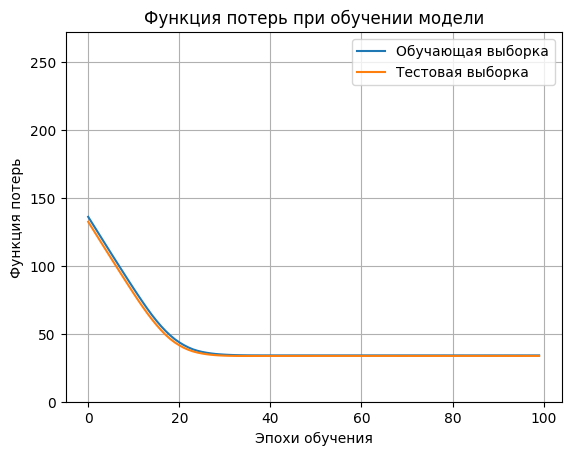

In [ ]:
plot_loss(history)

Заметим, что примерно после 30 эпохи, оин почти совподаются

### №4
4- Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок. 

In [ ]:
y_train.shape

(3428,)

In [ ]:
X_train.shape

(3428, 4)

После приминения polynomial у X сейчас 4-ех мерны вид

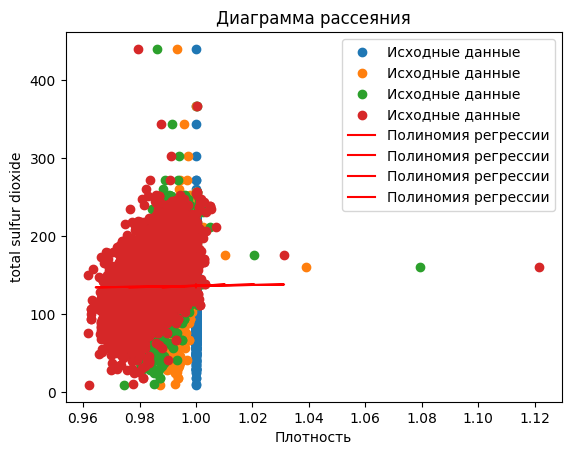

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], y_train, label='Исходные данные')
ax.scatter(X_train[:, 1], y_train, label='Исходные данные')
ax.scatter(X_train[:, 2], y_train, label='Исходные данные')
ax.scatter(X_train[:, 3], y_train, label='Исходные данные')
ax.plot(X_test, y_test_pred, color='red', label=f'Полиномия регрессии')
ax.set_xlabel('Плотность')
ax.set_ylabel('total sulfur dioxide')
ax.set_title('Диаграмма рассеяния')
ax.legend()
plt.show()

### №5


5.	Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании. 

In [ ]:
variances = df.var()
max_variance = variances.max()
print("Variances: ")
print(variances)
print("Max variance:", max_variance)

Variances: 
features/alcohol                    1.514427
features/chlorides                  0.000477
features/citric acid                0.014646
features/density                    0.000009
features/fixed acidity              0.712114
features/free sulfur dioxide      289.242706
features/pH                         0.022801
features/residual sugar            25.725771
features/sulphates                  0.013025
features/total sulfur dioxide    1806.085449
features/volatile acidity           0.010160
quality                             0.784356
dtype: float64
Max variance: 1806.08544921875


Мы берем free sulfur dioxide, так как total sulfur это наш Зависимы признок

### №6
6.	Визуализируйте этот признак в соответствии с индивидуальным заданием. 

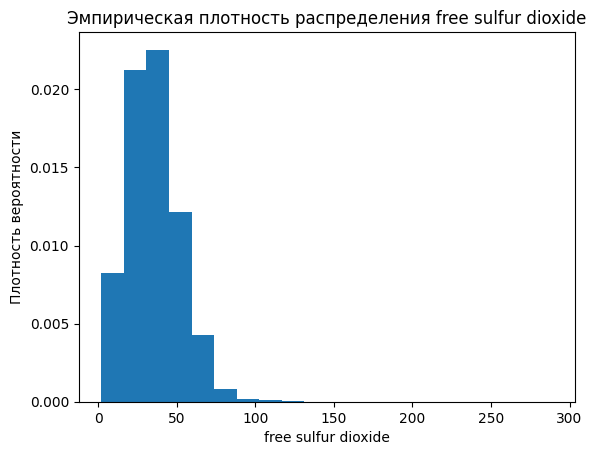

In [ ]:
fig, ax = plt.subplots()
ax.hist(df['features/free sulfur dioxide'], bins=20, density=True)
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('Плотность вероятности')
ax.set_title('Эмпирическая плотность распределения free sulfur dioxide')
plt.show()

### №7
7.	Сформируйте набор входных данных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков. 

In [ ]:
X = df[['features/density', 'features/free sulfur dioxide']]
y = df['features/total sulfur dioxide']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# Создание и адаптация нормализующего слоя
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(X_train)

### №8
8. Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. 

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3428, 2), (1470, 2), (3428,), (1470,))

Мы заметим, что в обучающей выборке 3428 точка, начнем с 10 точек и будем прибавлять по 500 точек на каждом шаге цикла

In [ ]:
# кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – relu.
# Создание нейронной сети
model = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Компиляция модели
model.compile(loss='mse', optimizer='adam')

# Обучение модели

train_score = []
test_score = []
history=[]
for i in range(11, 3428, 500):
    history.append(model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test)))
    y_train_predict = model.predict(X_train[:i])
    train_score.append(mean_absolute_error(y_train[:i], y_train_predict))
    y_test_predict = model.predict(X_test)
    test_score.append(mean_absolute_error(y_test, y_test_predict))
    print('-->', i, ' done')

Epoch 1/100
108/108 [==============================] - 1s 3ms/step - loss: 11765.9482 - val_loss: 2250.7126
Epoch 2/100
108/108 [==============================] - 0s 2ms/step - loss: 2000.9161 - val_loss: 1381.8282
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 1423.2120 - val_loss: 1094.5615
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 1139.3977 - val_loss: 970.7660
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 1025.4777 - val_loss: 899.8704
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 967.3386 - val_loss: 915.0052
Epoch 7/100
108/108 [==============================] - 0s 2ms/step - loss: 947.5628 - val_loss: 877.6739
Epoch 8/100
108/108 [==============================] - 0s 2ms/step - loss: 930.6874 - val_loss: 855.0667
Epoch 9/100
108/108 [==============================] - 0s 2ms/step - loss: 916.3757 - val_loss: 875.7753
Epoch 10/100
108/108 [========================

### №9
9.	Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

313/313 [==============================] - 0s 1ms/step


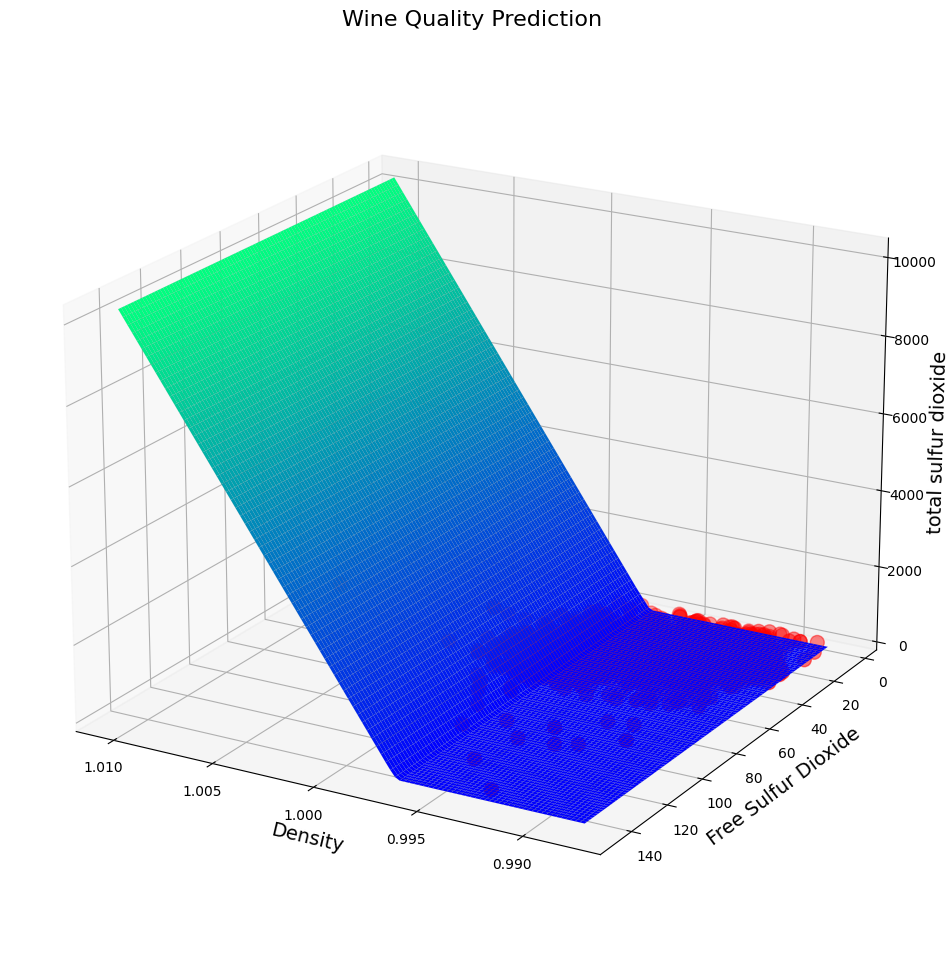

In [ ]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности
x_mesh, y_mesh = np.meshgrid(np.linspace(X_test['features/density'].min(), X_test['features/density'].max(), 100), \
                             np.linspace(X_test['features/free sulfur dioxide'].min(), X_test['features/free sulfur dioxide'].max(), 100))
z_mesh = model.predict(normalizer(np.c_[x_mesh.ravel(), y_mesh.ravel()])).reshape(x_mesh.shape)

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True,edgecolors='gray') 

# Построение точечного графика
xs = X_test['features/density']
ys = X_test['features/free sulfur dioxide']
zs = y_test
ax.scatter( xs, ys, zs, s=100, c='r' )

# Настройка осей и заголовка
ax.set_xlabel('Density', fontsize=14) 
ax.set_ylabel('Free Sulfur Dioxide', fontsize=14)
ax.set_zlabel('total sulfur dioxide', fontsize=14) 
ax.set_title('Wine Quality Prediction', fontsize=16)

# Настройка ограничений по оси z
ax.set_zlim(0., z_mesh.max())

# Настройка точки обзора
ax.view_init(elev = 20, azim = 120)

plt.show()

### №10
10.	Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

In [ ]:
len(train_score)

7

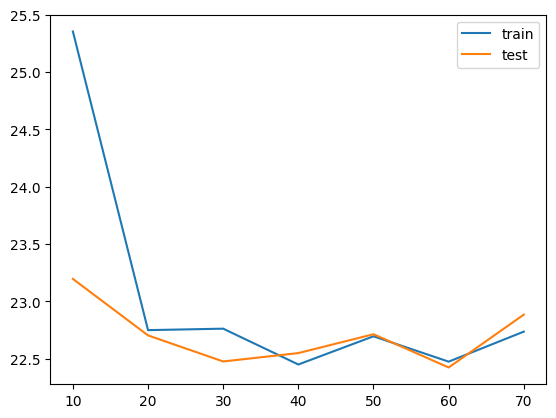

In [ ]:
plt.plot([i for i in range(10, 71, 10)], 
         train_score, label="train")
plt.plot([i for i in range(10, 71, 10)], 
         test_score, label="test")
plt.legend()
